In [288]:
# https://data.gov.ru/opendata/7708234640-59th-316/data-20161226T0100-structure-20161226T0100.csv


## Итоги социально-демографического обследования (микроперепись населения) 2015 года по показателю: 5–9 лет

In [289]:
import pandas as pd
import matplotlib.pyplot as plt


In [290]:
df = pd.read_csv("data-2016-12.csv", delimiter=",")


### Общие данные по России

In [291]:
# Посмотреть первые 9 строк
df.head(9)


,value,area,urban,gender
0,123842,Российская Федерация,Городское и сельское население,Оба пола
1,63484,Российская Федерация,Городское и сельское население,Мужчины
2,60358,Российская Федерация,Городское и сельское население,Женщины
3,77884,Российская Федерация,Городское население,Оба пола
4,39788,Российская Федерация,Городское население,Мужчины
5,38096,Российская Федерация,Городское население,Женщины
6,45958,Российская Федерация,Сельское население,Оба пола
7,23696,Российская Федерация,Сельское население,Мужчины
8,22262,Российская Федерация,Сельское население,Женщины


In [292]:
# Посмотреть все столбцы
# Возвращает список со строками строк - названиями столбцов в таблице
df.columns


Index(['value', 'area', 'urban', 'gender'], dtype='object')

### Городское и сельское население 5-9 лет по России

In [293]:
data_city = df[(df['gender'] == 'Оба пола') & (df['urban'] ==
                                                 'Городское население') & (df['area'] == 'Российская Федерация')]
data_country = df[(df['gender'] == 'Оба пола') & (df['urban'] ==
                                                  'Сельское население') & (df['area'] == 'Российская Федерация')]
print(data_city)
print(data_country)                                                


   value                  area                urban    gender
3  77884  Российская Федерация  Городское население  Оба пола
   value                  area               urban    gender
6  45958  Российская Федерация  Сельское население  Оба пола


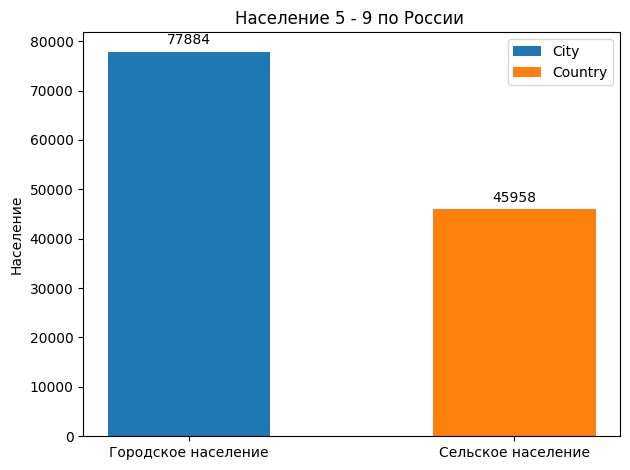

In [294]:
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(data_city['urban'], data_city['value'], width, label='City')
rects2 = ax.bar(data_country['urban'], data_country['value'], width, label='Country')

ax.set_ylabel('Население')
ax.set_title('Население 5 - 9 по России ')
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


In [295]:
data_Ru = df[(df['gender'] == 'Оба пола') & ((df['urban'] ==
                                             'Городское население') | (df['urban'] ==
                                             'Сельское население')) & (df['area'] == 'Российская Федерация')]


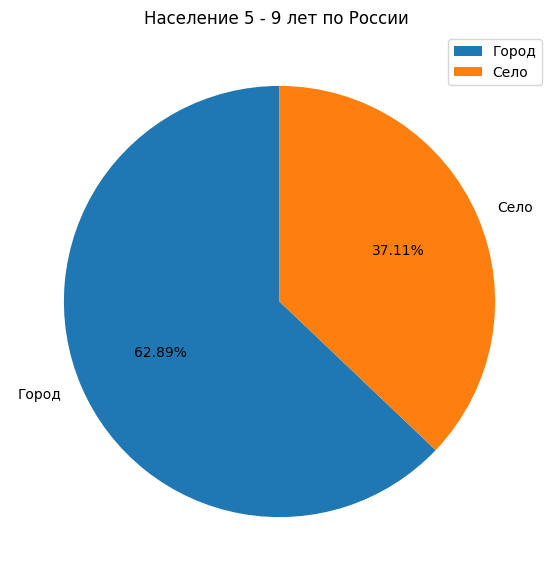

In [296]:
fig, ax = plt.subplots(figsize=(10, 7))
data = data_Ru['value']
data_labels = ['Город', 'Село']
wedges, texts, autotexts = plt.pie(data, labels=data_labels, shadow=False,
        startangle=90, autopct='%1.2f%%')
plt.legend()
ax.set_title('Население 5 - 9 лет по России ')
plt.show()


### Регионы, где сельского населения 5-9 лет меньше 100 человек

In [297]:
df[(df['value'] < 100) & (df['gender'] == 'Оба пола') & (df['urban'] == 'Сельское население')]

,value,area,urban,gender
222,70,Ненецкий автономный округ,Сельское население,Оба пола
792,47,Магаданская область,Сельское население,Оба пола


### Регионы, где сельского населения 5-9 лет больше 1000 человек

In [298]:
df[(df['value'] > 1000) & (df['value'] < 3000) & (df['gender'] == 'Оба пола') & (df['urban'] == 'Сельское население')]
# <3000 чтобы исключить округа


,value,area,urban,gender
315,1355,Краснодарский край,Сельское население,Оба пола
360,1706,Республика Дагестан,Сельское население,Оба пола
405,1343,Чеченская Республика,Сельское население,Оба пола
414,1107,Ставропольский край,Сельское население,Оба пола
432,1331,Республика Башкортостан,Сельское население,Оба пола
585,1159,Тюменская область,Сельское население,Оба пола
666,1145,Алтайский край,Сельское население,Оба пола


### Население по регионам

In [299]:
data_region = df[(df['gender'] == 'Оба пола') & (df['urban'] ==
                                           'Городское и сельское население') & (df['area'] != 'Российская Федерация')]
print(data_region)


     value                           area                           urban  \
9    26115  Центральный федеральный округ  Городское и сельское население   
18    1337           Белгородская область  Городское и сельское население   
27    1254               Брянская область  Городское и сельское население   
36    1256           Владимирская область  Городское и сельское население   
45    1313            Воронежская область  Городское и сельское население   
..     ...                            ...                             ...   
777   1062               Амурская область  Городское и сельское население   
786    550            Магаданская область  Городское и сельское население   
795    904            Сахалинская область  Городское и сельское население   
804    741   Еврейская автономная область  Городское и сельское население   
813    399     Чукотский автономный округ  Городское и сельское население   

       gender  
9    Оба пола  
18   Оба пола  
27   Оба пола  
36   Оба по

### Регион, где меньше всего детей 5-9 лет

In [300]:
data_region.loc[data_region['value'] == data_region['value'].min()]



,value,area,urban,gender
216,226,Ненецкий автономный округ,Городское и сельское население,Оба пола


### Детское население 5 - 9 лет по округам

In [301]:
data_district = df[(df['gender'] == 'Оба пола') & (df['urban'] ==
                                                   'Городское и сельское население') & (df['area'].str.split().str[-1] == 'округ')]

print(data_district)


     value                                 area  \
9    26115        Центральный федеральный округ   
180  11934    Северо-Западный федеральный округ   
216    226            Ненецкий автономный округ   
282   9810              Южный федеральный округ   
345  11504  Северо-Кавказский федеральный округ   
417  23538        Приволжский федеральный округ   
552  10426          Уральский федеральный округ   
597   1004      Ямало-Ненецкий автономный округ   
615  20274          Сибирский федеральный округ   
732   9215    Дальневосточный федеральный округ   
813    399           Чукотский автономный округ   

                              urban    gender  
9    Городское и сельское население  Оба пола  
180  Городское и сельское население  Оба пола  
216  Городское и сельское население  Оба пола  
282  Городское и сельское население  Оба пола  
345  Городское и сельское население  Оба пола  
417  Городское и сельское население  Оба пола  
552  Городское и сельское население  Оба пола  
597

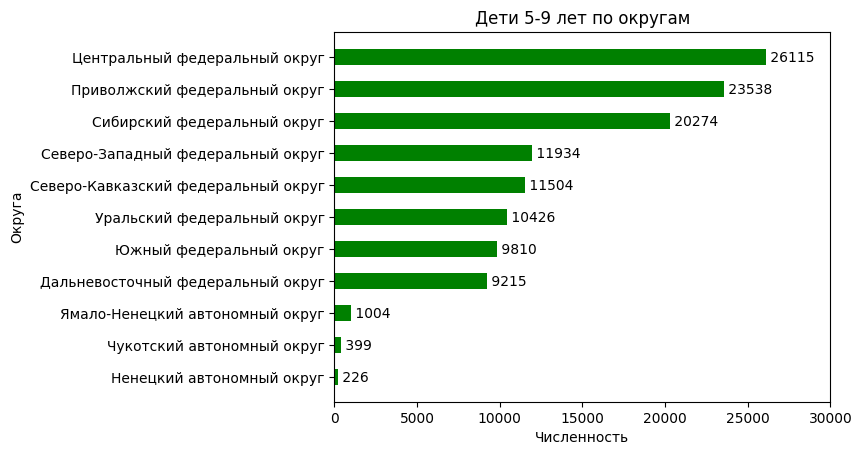

In [302]:
fig, ax = plt.subplots()
data_district_sort =  data_district.sort_values('value')
ax.barh(data_district_sort['area'], data_district_sort['value'],
        align='center', height=0.5, color='g')

rects = ax.patches
for (d, r) in zip(data_district_sort['value'], rects):
    ax.text(r.get_x()+r.get_width(), r.get_y()+0.1, f" {d}" )

ax.set_title('Дети 5-9 лет по округам')
ax.set_xlabel('Численность')
ax.set_ylabel('Округа')
ax.set_xlim(xmax = 30000)
plt.show()


Разобьем отдельно на городское и сельское население для округов

In [303]:
# df.loc[(df['gender'] == 'Оба пола') & (df['urban'] == 'Городское население') & (df['area'].str.split().str[-1] == 'округ'), 'urban_group'] = 'Городское население'
# df.loc[(df['gender'] == 'Оба пола') & (df['urban'] == 'Сельское население') & (df['area'].str.split().str[-1] == 'округ'), 'urban_group'] = 'Сельское население'


In [304]:
# data_urban_group = df.groupby(
#     'urban_group', group_keys=False).apply(lambda x: x)
# # ['value']
# print(data_urban_group)
# ['value'].mean().plot(kind='bar')
# data_urban_group.plot(kind = 'bar')
